In [4]:
gd = {
    "problem": {
        "type": "mnist_digits",
        "data": "../res/ej4/xor.txt",
        "output": "output/ej4/xor.csv"
    },
    "network": {
        "topology": [
            784,
            30,
            10
        ],
        "activation_function": {
            "method": "sigmoid",
            "beta": 1
        },
        "optimizer": {
            "method": "gradient_descent"
        }
    },
    "training": {
        "seed": 42,
        "epochs": 20,
        "mini_batch_size": 16,
        "learning_rate": 0.5,
        "epsilon": 0.01
    }
}

momentum = {
    "problem": {
        "type": "mnist_digits",
        "data": "../res/ej4/xor.txt",
        "output": "output/ej4/xor.csv"
    },
    "network": {
        "topology": [
            784,
            30,
            10
        ],
        "activation_function": {
            "method": "sigmoid",
            "beta": 1
        },
        "optimizer": {
            "method": "momentum",
            "alpha": 0.9
        }
    },
    "training": {
        "seed": 42,
        "epochs": 20,
        "mini_batch_size": 16,
        "learning_rate": 0.1,
        "epsilon": 0.01
    }
}

adam = {
    "problem": {
        "type": "mnist_digits",
        "data": "../res/ej4/xor.txt",
        "output": "output/ej4/xor.csv"
    },
    "network": {
        "topology": [
            784,
            30,
            10
        ],
        "activation_function": {
            "method": "sigmoid",
            "beta": 1
        },
        "optimizer": {
            "method": "adam",
            "beta_1": 0.9,
            "beta_2": 0.999,
            "epsilon": 1e-8
        }
    },
    "training": {
        "seed": 42,
        "epochs": 30,
        "mini_batch_size": 16,
        "learning_rate": 0.1,
        "epsilon": 0.01
    }
}

In [5]:
import numpy as np
import tensorflow as tf
def prepare_mnist_data():
    """
    Prepares the MNIST dataset for training.
    """
    (x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

    x_train = x_train.reshape(-1, 28*28).astype('float32') / 255
    x_test = x_test.reshape(-1, 28*28).astype('float32') / 255
    y_train = np.eye(10)[y_train]
    y_test = np.eye(10)[y_test]

    training_data = [(x.reshape(784, 1), y.reshape(10, 1))
                     for x, y in zip(x_train, y_train)]
    test_data = [(x.reshape(784, 1), y.reshape(10, 1))
                 for x, y in zip(x_test, y_test)]
    return training_data, test_data

training_data, test_data= prepare_mnist_data()

In [6]:
from models.mlp.network_2 import MultilayerPerceptron
from utils.config import Config


models = []
config = Config()
gd_config = config.get_json(gd)
momentum_config = config.get_json(momentum)
adam_config = config.get_json(adam)


mlp_adam = MultilayerPerceptron(
    seed=42,
    sizes=adam_config.topology,
    activation_function=adam_config.activation_function,
    optimizer=adam_config.optimizer
)

mlp_adam.fit(training_data,
                    epochs=momentum_config.epochs,
                    mini_batch_size=momentum_config.mini_batch_size,
                    eta=momentum_config.learning_rate,
                    test_data=test_data
                    )


models.append(mlp_adam)

model_copy = models.copy()



Epoch 0: 9216 / 10000
Epoch 1: 9339 / 10000
Epoch 2: 9412 / 10000
Epoch 3: 9420 / 10000
Epoch 4: 9460 / 10000
Epoch 5: 9436 / 10000
Epoch 6: 9490 / 10000
Epoch 7: 9459 / 10000
Epoch 8: 9488 / 10000
Epoch 9: 9494 / 10000
Epoch 10: 9520 / 10000
Epoch 11: 9496 / 10000
Epoch 12: 9498 / 10000
Epoch 13: 9514 / 10000
Epoch 14: 9505 / 10000
Epoch 15: 9527 / 10000
Epoch 16: 9516 / 10000
Epoch 17: 9516 / 10000
Epoch 18: 9516 / 10000
Epoch 19: 9512 / 10000


AttributeError: 'MultilayerPerceptron' object has no attribute 'save'

20
20
20
0
0
0


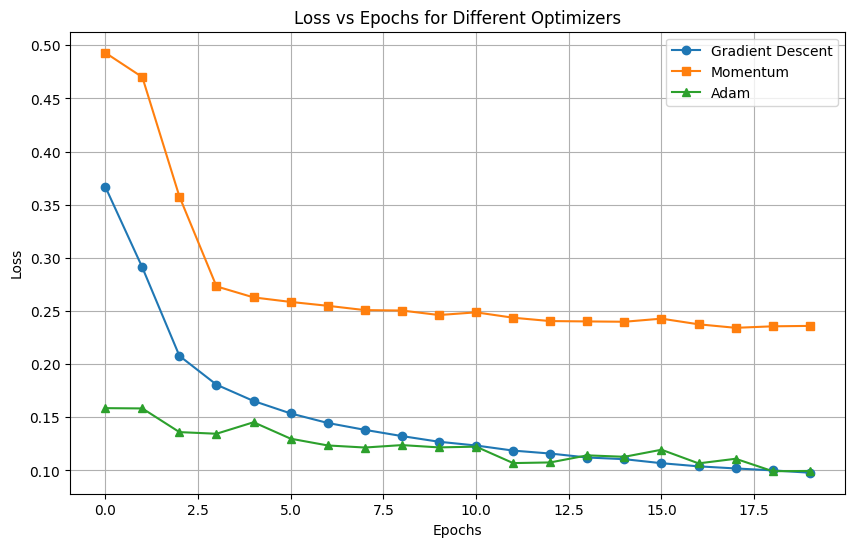

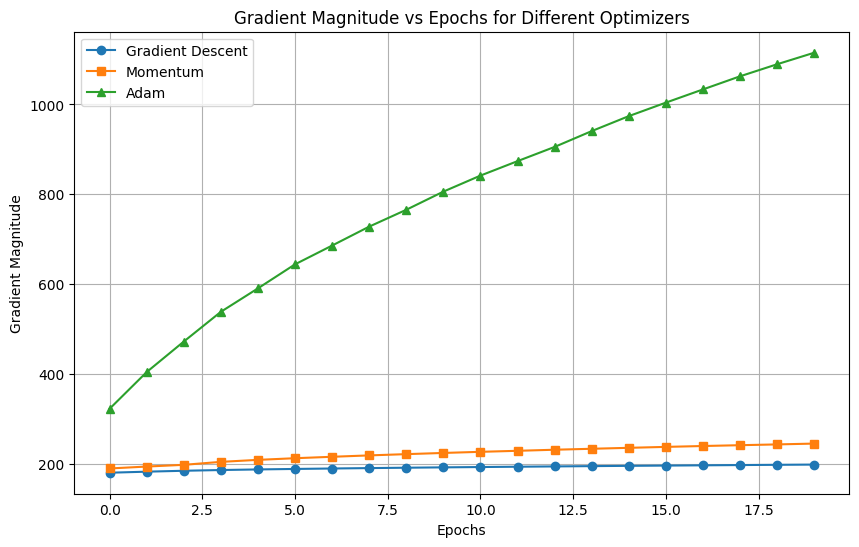

In [8]:
import matplotlib.pyplot as plt

# Assuming the models have already been trained and their histories are stored
# Example dictionaries holding history data for each optimizer (replace with your actual data)

gd_history = mlp_gd.history  # Example: Gradient Descent model history
momentum_history = mlp_momentum.history  # Example: Momentum model history
adam_history = mlp_adam.history  # Example: Adam model history

# Extract the necessary data for plotting
epochs = range(len(gd_history['loss']))

## print lenghts

print(len(gd_history['loss']))
print(len(momentum_history['loss']))
print(len(adam_history['loss']))


# Loss history
gd_loss = gd_history['loss']
momentum_loss = momentum_history['loss']
adam_loss = adam_history['loss']

# Accuracy history
gd_accuracy = gd_history['accuracy']
momentum_accuracy = momentum_history['accuracy']
adam_accuracy = adam_history['accuracy']

print(len(gd_accuracy))
print(len(momentum_accuracy))
print(len(adam_accuracy))


# Gradient magnitude history
gd_grad_magnitude = gd_history['grad_magnitudes']
momentum_grad_magnitude = momentum_history['grad_magnitudes']
adam_grad_magnitude = adam_history['grad_magnitudes']


# Plotting Loss vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, gd_loss, label="Gradient Descent", linestyle='-', marker='o')
plt.plot(epochs, momentum_loss, label="Momentum", linestyle='-', marker='s')
plt.plot(epochs, adam_loss, label="Adam", linestyle='-', marker='^')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss vs Epochs for Different Optimizers")
plt.legend()
plt.grid(True)
plt.show()



# Plotting Gradient Magnitude vs. Epochs
plt.figure(figsize=(10, 6))
plt.plot(epochs, gd_grad_magnitude, label="Gradient Descent", linestyle='-', marker='o')
plt.plot(epochs, momentum_grad_magnitude, label="Momentum", linestyle='-', marker='s')
plt.plot(epochs, adam_grad_magnitude, label="Adam", linestyle='-', marker='^')
plt.xlabel("Epochs")
plt.ylabel("Gradient Magnitude")
plt.title("Gradient Magnitude vs Epochs for Different Optimizers")
plt.legend()
plt.grid(True)
plt.show()


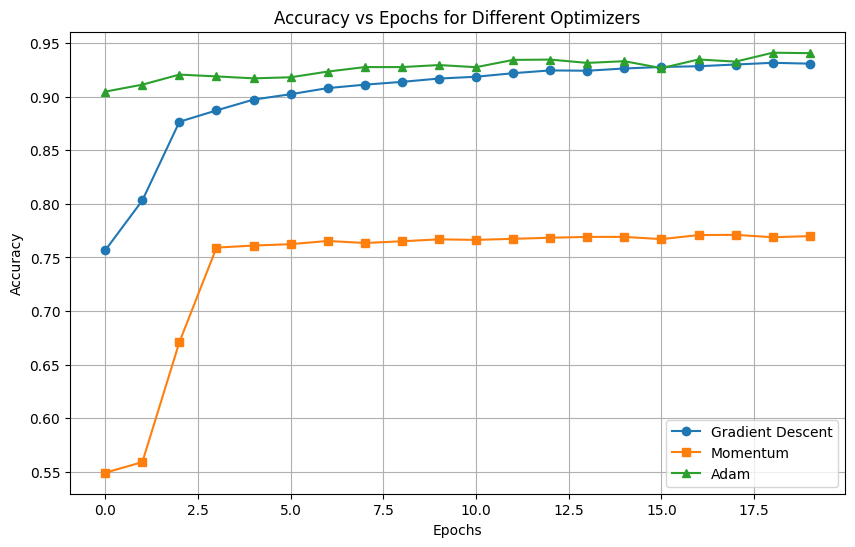

In [11]:
import matplotlib.pyplot as plt

# Given accuracy data for 20 epochs for each optimizer
gd_accuracy = [7567, 8032, 8766, 8872, 8973, 9023, 9080, 9112, 9138, 9169, 
               9186, 9219, 9245, 9242, 9263, 9277, 9284, 9300, 9316, 9308]
momentum_accuracy = [5492, 5591, 6711, 7592, 7611, 7624, 7654, 7635, 7651, 7669, 
                     7664, 7674, 7684, 7692, 7692, 7671, 7709, 7711, 7689, 7699]
adam_accuracy = [9047, 9112, 9206, 9189, 9171, 9181, 9234, 9276, 9276, 9295, 
                 9275, 9343, 9346, 9315, 9331, 9266, 9347, 9327, 9410, 9406]

epochs = range(20)  # First 20 epochs for each optimizer

#calculate accuracy percentage over 10000
gd_accuracy = [x/10000 for x in gd_accuracy]
momentum_accuracy = [x/10000 for x in momentum_accuracy]
adam_accuracy = [x/10000 for x in adam_accuracy]

# Plot the accuracy for each optimizer
plt.figure(figsize=(10, 6))
plt.plot(epochs, gd_accuracy, label="Gradient Descent", linestyle='-', marker='o')
plt.plot(epochs, momentum_accuracy, label="Momentum", linestyle='-', marker='s')
plt.plot(epochs, adam_accuracy, label="Adam", linestyle='-', marker='^')

# Labels and title
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.title("Accuracy vs Epochs for Different Optimizers")
plt.legend()
plt.grid(True)
plt.show()
